**1. Installing and Import Necessary Libraries**

In [6]:
pip install openai

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import openai
import os
from scipy.stats import mode


**2. Load Dataset**

In [8]:
# Load quiz_attempts.csv
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/flexisaf/quiz_attempts_dataset.csv')

# Display first rows
df.head()

,user_id,quiz_id,score,time_taken,timestamp
0,1,1,78,320,2025-01-05 09:14:22
1,2,1,82,298,2025-01-12 09:18:10
2,3,2,60,410,2025-01-15 10:22:19
3,4,2,72,360,2025-01-20 11:02:45
4,5,1,45,520,2025-01-05 09:30:55


**3. Explore the Data**

In [9]:
# Data overview
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     40 non-null     int64 
 1   quiz_id     40 non-null     int64 
 2   score       40 non-null     int64 
 3   time_taken  40 non-null     int64 
 4   timestamp   40 non-null     object
dtypes: int64(4), object(1)
memory usage: 1.7+ KB


In [10]:
# Summary statistics
df.describe()


,user_id,quiz_id,score,time_taken
count,40.000000,40.000000,40.000000,40.000000
mean,20.500000,1.975000,64.000000,451.200000
std,11.690452,0.831665,20.582542,171.725511
min,1.000000,1.000000,20.000000,195.000000
25%,10.750000,1.000000,49.500000,307.500000
50%,20.500000,2.000000,64.000000,415.000000
75%,30.250000,3.000000,82.000000,550.000000
max,40.000000,3.000000,96.000000,850.000000


**4. Basic Statistics for Numerical Features**

In [11]:

numerical_cols = ["score", "time_taken"]

stats = {
    "mean": df[numerical_cols].mean(),
    "median": df[numerical_cols].median(),
    "mode": df[numerical_cols].mode().iloc[0],
    "std_dev": df[numerical_cols].std()
}

stats


{'mean': score          64.0
 time_taken    451.2
 dtype: float64,
 'median': score          64.0
 time_taken    415.0
 dtype: float64,
 'mode': score          45.0
 time_taken    300.0
 Name: 0, dtype: float64,
 'std_dev': score          20.582542
 time_taken    171.725511
 dtype: float64}

**5. Correlation Analysis**


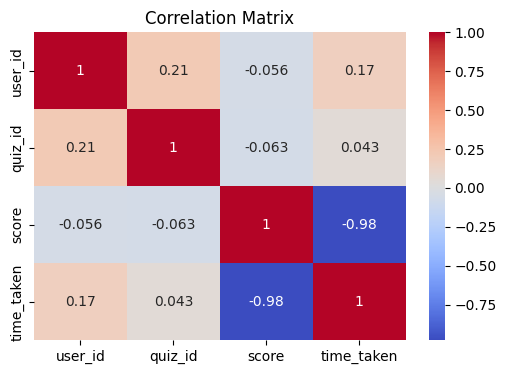

In [12]:
plt.figure(figsize=(6,4))

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


**6. Leaderboard Analytics**

In [13]:
leaderboard = df.groupby("user_id")["score"].mean().sort_values(ascending=False)
leaderboard.head(10)


,score
user_id,
18,96.0
17,95.0
36,92.0
10,90.0
35,90.0
9,88.0
34,87.0
20,85.0
33,85.0


**Average Score**

In [35]:
avg_score = df['score'].mean()
print(f"Average Score: {avg_score:.2f}")


Average Score: 64.00


**Fastest / Slowest Completion**

In [36]:
fastest_time = df['time_taken'].min()
slowest_time = df['time_taken'].max()
print(f"Fastest Completion: {fastest_time} minutes")
print(f"Slowest Completion: {slowest_time} minutes")


Fastest Completion: 195 minutes
Slowest Completion: 850 minutes


**Improvement Trends**

In [37]:
# Ensure timestamp is datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Sort by user and timestamp
df_sorted = df.sort_values(['user_id', 'timestamp'])

# Compute score difference for each user
df_sorted['score_diff'] = df_sorted.groupby('user_id')['score'].diff()

# Show improvement trends
improvement_summary = df_sorted.groupby('user_id')['score_diff'].sum().reset_index()
improvement_summary.rename(columns={'score_diff':'total_score_change'}, inplace=True)

print(improvement_summary)


    user_id  total_score_change
0         1                 0.0
1         2                 0.0
2         3                 0.0
3         4                 0.0
4         5                 0.0
5         6                 0.0
6         7                 0.0
7         8                 0.0
8         9                 0.0
9        10                 0.0
10       11                 0.0
11       12                 0.0
12       13                 0.0
13       14                 0.0
14       15                 0.0
15       16                 0.0
16       17                 0.0
17       18                 0.0
18       19                 0.0
19       20                 0.0
20       21                 0.0
21       22                 0.0
22       23                 0.0
23       24                 0.0
24       25                 0.0
25       26                 0.0
26       27                 0.0
27       28                 0.0
28       29                 0.0
29       30                 0.0
30      

**7. Score Distribution Visualization**

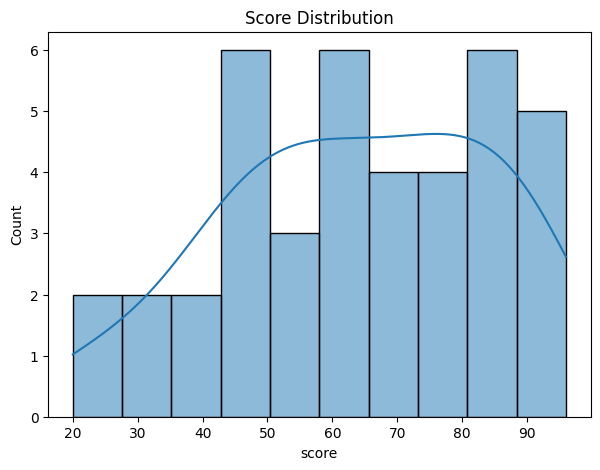

In [14]:
plt.figure(figsize=(7,5))
sns.histplot(df["score"], bins=10, kde=True)
plt.title("Score Distribution")
plt.show()


**8. Boxplot of: Time Taken vs Score**

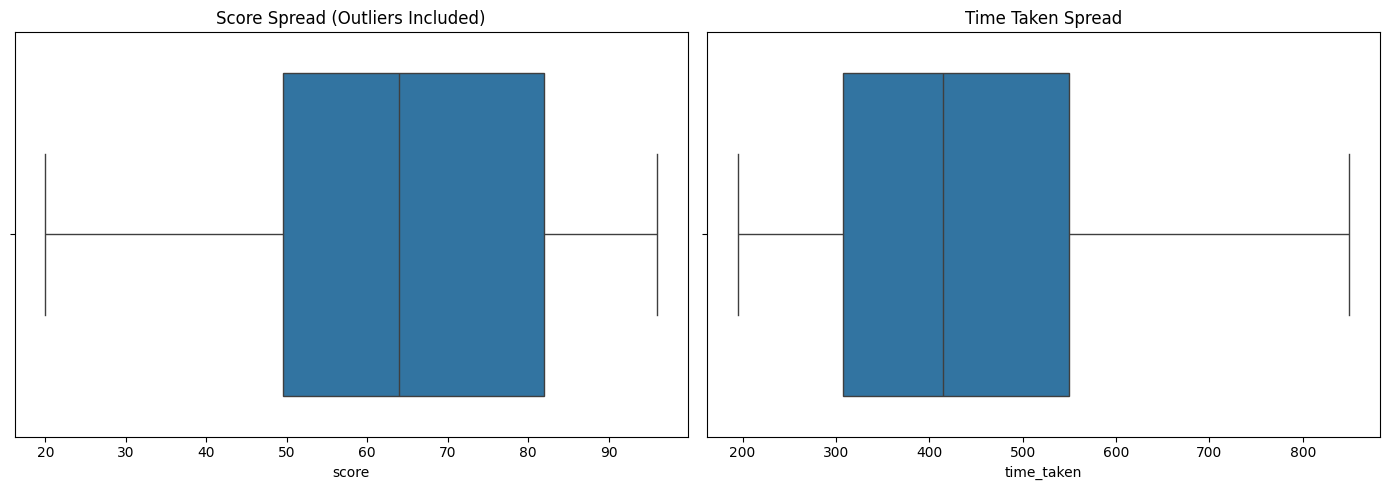

In [15]:
# Create a figure with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(14, 5))  # width 14, height 5

# Boxplot for 'score'
sns.boxplot(x=df["score"], ax=axes[0])
axes[0].set_title("Score Spread (Outliers Included)")

# Boxplot for 'time_taken'
sns.boxplot(x=df["time_taken"], ax=axes[1])
axes[1].set_title("Time Taken Spread")

# Adjust layout
plt.tight_layout()
plt.show()

**9. User Improvement Over Time**

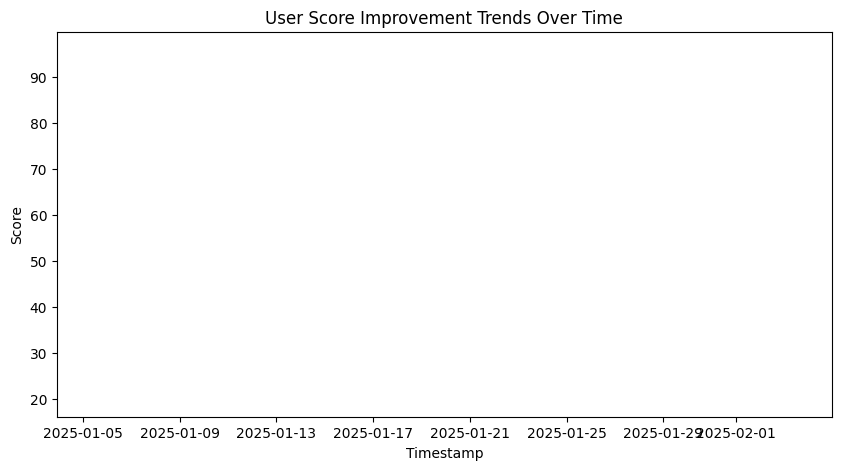

In [16]:
df["timestamp"] = pd.to_datetime(df["timestamp"])
user_trends = df.sort_values("timestamp")

plt.figure(figsize=(10,5))
for uid, subset in user_trends.groupby("user_id"):
    plt.plot(subset["timestamp"], subset["score"], alpha=0.4)

plt.title("User Score Improvement Trends Over Time")
plt.xlabel("Timestamp")
plt.ylabel("Score")
plt.show()


**10. Detect Anomalies (Possible Cheating Flags)**
Rules:

Sudden +40% score jump

Very fast time but very high score

Regression after strong progress

In [17]:
anomalies = []

for uid, grp in df.groupby("user_id"):
    grp = grp.sort_values("timestamp")
    scores = grp["score"].values
    times = grp["time_taken"].values

    for i in range(1, len(scores)):
        # Rule 1: sudden jump
        if scores[i] - scores[i-1] >= 40:
            anomalies.append((uid, "Sudden score jump", scores[i-1], scores[i]))

        # Rule 2: too fast and too high
        if times[i] < times.mean() * 0.4 and scores[i] > scores.mean():
            anomalies.append((uid, "Suspicious fast high score", times[i], scores[i]))

anomalies_df = pd.DataFrame(anomalies, columns=["user_id", "issue", "previous", "current"])
anomalies_df


,user_id,issue,previous,current


**11. Scatter Plot: Score vs Time Taken**

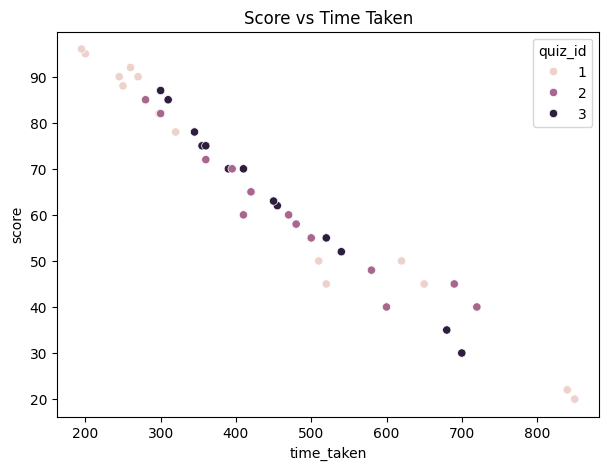

In [18]:
plt.figure(figsize=(7,5))
sns.scatterplot(x="time_taken", y="score", hue="quiz_id", data=df)
plt.title("Score vs Time Taken")
plt.show()


**12. AI-Powered Personalized Feedback (Rule-Based)**

In [19]:
def generate_rule_based_feedback(row):
    score = row["score"]
    time_taken = row["time_taken"]

    if score < 40:
        return "Your score is low. Consider revising the quiz topics and practicing more."
    elif score > 80 and time_taken < df["time_taken"].mean() * 0.6:
        return "Excellent work! You answered quickly and accurately."
    elif score > 80:
        return "Great score! Try increasing speed for even better performance."
    elif score - df["score"].mean() > 20:
        return "You're performing above average. Keep up the improvement!"
    else:
        return "Good effort! Review your mistakes to improve further."

df["rule_based_feedback"] = df.apply(generate_rule_based_feedback, axis=1)
df.head()


,user_id,quiz_id,score,time_taken,timestamp,rule_based_feedback
0,1,1,78,320,2025-01-05 09:14:22,Good effort! Review your mistakes to improve f...
1,2,1,82,298,2025-01-12 09:18:10,Great score! Try increasing speed for even bet...
2,3,2,60,410,2025-01-15 10:22:19,Good effort! Review your mistakes to improve f...
3,4,2,72,360,2025-01-20 11:02:45,Good effort! Review your mistakes to improve f...
4,5,1,45,520,2025-01-05 09:30:55,Good effort! Review your mistakes to improve f...


**13. AI-Powered GPT Feedback (Optional API)**

In [ ]:
# Minimal GPT Feedback Test
openai.api_key = os.getenv("OPENAI_API_KEY")

prompt = "Generate a short feedback for a learner who scored 78 in 12 minutes on a quiz."

response = openai.ChatCompletion.create(
    model="gpt-4o-mini",
    messages=[{"role":"user","content":prompt}],
    temperature=0.7
)

print(response.choices[0].message["content"])


Great job on completing the quiz! Scoring 78 is a solid achievement, especially in just 12 minutes. Your quick thinking and understanding of the material are evident. To improve further, consider reviewing the questions you found challenging. Keep up the good work!


In [32]:
# Apply GPT Feedback to DataFrame
def gpt_feedback(score, time_taken):
    prompt = f"Generate short, constructive feedback for a learner who scored {score} in {time_taken} minutes."
    try:
        response = openai.ChatCompletion.create(
            model="gpt-4o-mini",
            messages=[{"role": "user", "content": prompt}],
            temperature=0.7
        )
        return response.choices[0].message["content"].strip()
    except Exception as e:
        return f"Error: {e}"

# Example: apply to first 5 rows to avoid hitting quota
df['GPT_Feedback'] = df.head(5).apply(lambda x: gpt_feedback(x['score'], x['time_taken']), axis=1)
df[['user_id','quiz_id','score','time_taken','GPT_Feedback']]


,user_id,quiz_id,score,time_taken,GPT_Feedback
0,1,1,78,320,Great job on scoring 78! That's a solid effort...
1,2,1,82,298,Great job on scoring 82! Your effort is commen...
2,3,2,60,410,Error: Rate limit reached for gpt-4o-mini in o...
3,4,2,72,360,Error: Rate limit reached for gpt-4o-mini in o...
4,5,1,45,520,Error: Rate limit reached for gpt-4o-mini in o...
5,6,1,50,510,NaN
6,7,2,58,480,NaN
7,8,3,62,455,NaN
8,9,1,88,250,NaN
9,10,1,90,245,NaN


**14. Conclusion Output**

In [34]:
print("Analysis Complete!")
print("Leaderboard, trends, anomalies, and visualizations generated successfully.")


Analysis Complete!
Leaderboard, trends, anomalies, and visualizations generated successfully.
